In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings

#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Straight coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/900yr/27000101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)

# path to ocean_month file
path_month_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/900yr/27000101.ocean_month.nc'
dm_straight = xr.open_dataset(path_month_straight, decode_times=True)

# path to ice_month file
path_month_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/900yr/27000101.ice_month.nc'
di_straight = xr.open_dataset(path_month_straight, decode_times=True)


# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/900yr/27000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)

# path to ocean_month file
path_month_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/900yr/27000101.ocean_month.nc'
dm_both = xr.open_dataset(path_month_both, decode_times=True)

# path to ice_month file
path_month_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/900yr/27000101.ice_month.nc'
di_both = xr.open_dataset(path_month_both, decode_times=True)

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


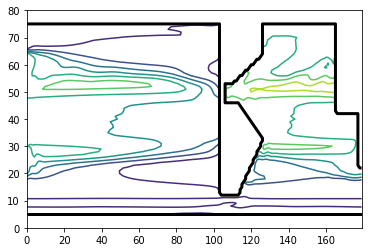

In [7]:
sss = dy_both['sos'].mean(dim='time')
mask = np.zeros(sss.shape, dtype=bool)
mask = np.where(~np.isnan(sss), mask, 1)

mask_sss = np.ma.array(sss, mask=mask)

fig, ax = plt.subplots()
plt.contour(mask_sss)

plt.contour(mask, [0.01], colors="k", linewidths=3)

plt.show()

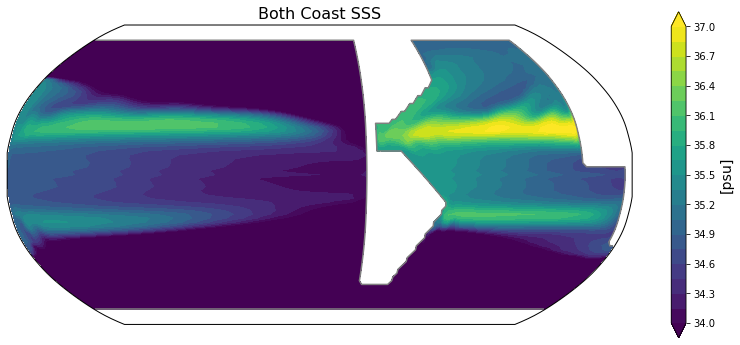

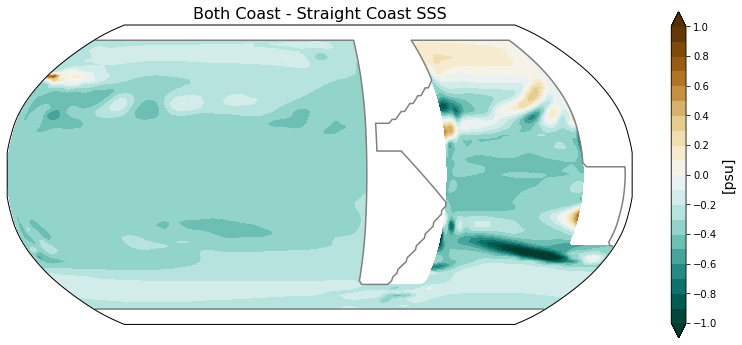

In [20]:
b_salt = np.linspace(34, 37, 21, endpoint=True)
t_salt = np.linspace(34, 37, 11, endpoint=True)

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(dy_both['xh'], dy_both['yh'], dy_both['sos'].mean(dim='time'),  b_salt, 
             extend='both', transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t_salt, boundaries=t_salt, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[psu]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('{} SSS'.format(case_both), fontsize=16)
plt.contour(dy_both['xh'], dy_both['yh'], mask, [0.01], colors='gray', linewidth=2, transform=ccrs.PlateCarree())
plt.show()


b_salt = np.linspace(-1, 1, 21, endpoint=True)
t_salt = np.linspace(-1, 1, 11, endpoint=True)

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
plt.contourf(dy_straight['xh'], dy_straight['yh'], 
             dy_both['sos'].mean(dim='time')-dy_straight['sos'].mean(dim='time'), 
             b_salt, cmap='BrBG_r', extend='both', transform=ccrs.PlateCarree())
cbar = plt.colorbar(ticks=t_salt, boundaries=t_salt, spacing='uniform', extend='both')
cbar.ax.set_ylabel('[psu]', fontsize=14)
plt.ylabel('Latitude', fontsize=14), plt.xlabel('Longitude', fontsize=14)
plt.title('{} - {} SSS'.format(case_both, case_straight), fontsize=16)
plt.contour(dy_both['xh'], dy_both['yh'], mask, [0.01], colors='gray', linewidth=2, transform=ccrs.PlateCarree())
plt.show()